<a href="https://colab.research.google.com/github/HanJaeHui-GitHub/ESAA/blob/main/ESAA_YB_Week13_markdown(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13주차 과제_1125(월)

파이썬 머신러닝 완벽가이드 ch7. 3\~4 pg. 449~463

## 평균 이동

### 평균 이동(Mean Shift)의 개요

**평균 이동**

K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화 수행

중심에 소속된 데이터의 평균 거리 중심으로 이동하는 K-평균과 다르게 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동 시킴

**평균 이동 군집화**

데이터의 분포도를 이용해 군집 중심점을 찾음

- 군집 중심점 : 데이터 포인트가 모여 있는 곳이라는 생각에서 착안한 것으로 이를 위해 확률 밀도 함수(probability density function)를 이용함

    가장 집중적으로 데이터가 모여 있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해 KDX(Kernel Density Estimation)를 이용함

특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현대 위치에서 업데이트하면서 이동하는 방식을 취함

↪ 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아냄

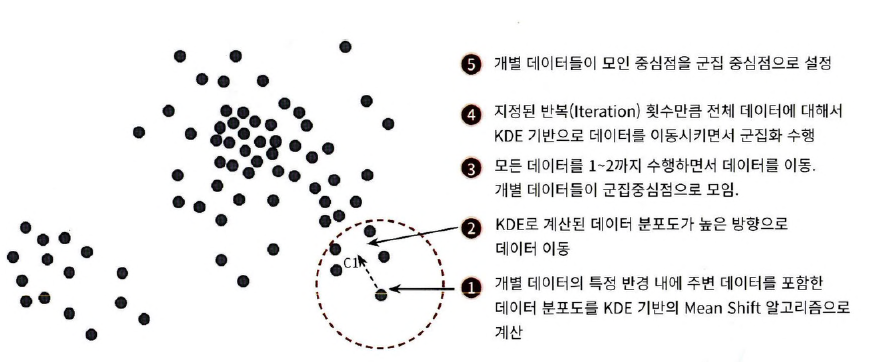

**KDE(Kernel Density Estimation)**

커널(Kernel) 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법

관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수 추정

대표적인 커널 함수로 가우시안 분포 함수가 사용됨

$$KDE=\frac{1}{n}\displaystyle\sum_{i=1}^{n}K_h(x-x_i)=\frac{1}{nh}\displaystyle\sum_{i=1}^{n}K(\frac{x-x_i}{h})$$

- $h$ : 대역폭 → KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용

    이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우함

    작은 h 값(1.0) : 좁고 뾰족한 KDE → 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉬움

    큰 h 값(10) : 과도하게 평활화 된 KDE → 지나치게 단순화된 방식으로 추정하여 과소적합(under-fitting)하기 쉬움

    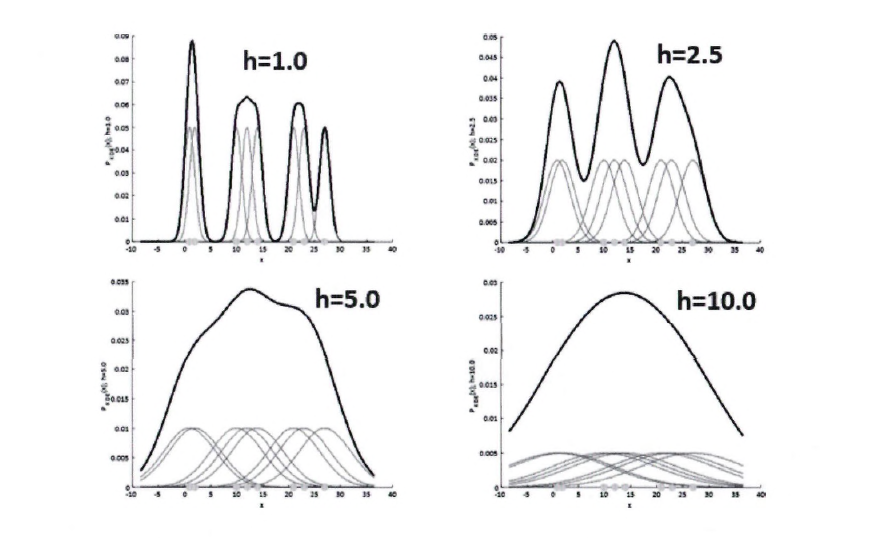

    대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가짐

    군집 개수를 지정하지 않으며 오직 대역폭의 크기에 따라 군집화 수행



사이킷런에서 평균 이동 군집화를 위해 MeanShift 클래스 제공

가장 중요한 파라미터 bandwidth → KDA의 대역폭 h와 동일

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


군집이 0부터 5까지 6개로 지나치게 세분화돼 군집화 됨

↪ binwidth 값을 작게할수록 군집 개수가 증가하므로 binwidth를 살짝 높인 1.0으로 MeanShift 수행

In [2]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


3의 군집으로 줄어든 것을 확인할 수 있음

In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwith 값:', round(bandwidth, 3))

bandwith 값: 1.816


In [4]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


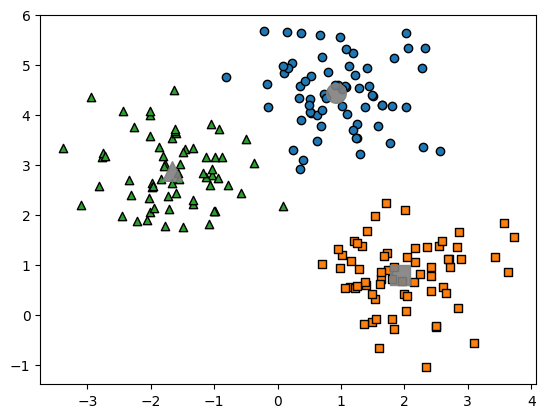

In [5]:
# 3개의 군집 시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]

    # 시각화
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray',alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker=''%label)

plt.show()

In [6]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


평균 이동 장점

- 데이터 세트의 형태를 특정 형태로 가정하거나 특정 분포도 기반의 모델로 가정하지 않기 때문에 유연한 군집화 가능

- 이상치의 영향력이 크지 않음

- 미리 군집의 개수를 정할 필요 없음

단점

- 알고리즘 수행 시간 오래 걸림

- binwidth의 크기에 따른 군집화 영향도가 매우 큼

## GMM(Gaussian Mixture Model)

### GMM(Gaussian Mixture Model) 소개

**GMM 군집화**

군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistribution)를 가진 데이터 집합들이 섞여서 생성된 가정하에 군집화를 수행하는 방식

- 정규 분포(Normal Distribution)

    가우시안 분포와 동일한 것으로 좌우 대칭형의 종 형태를 가진 통계학에서 가장 잘 알려진 연속 확률 함수

    평균 μ를 중심으로 높은 데이터 분포도를 가지고 있음

    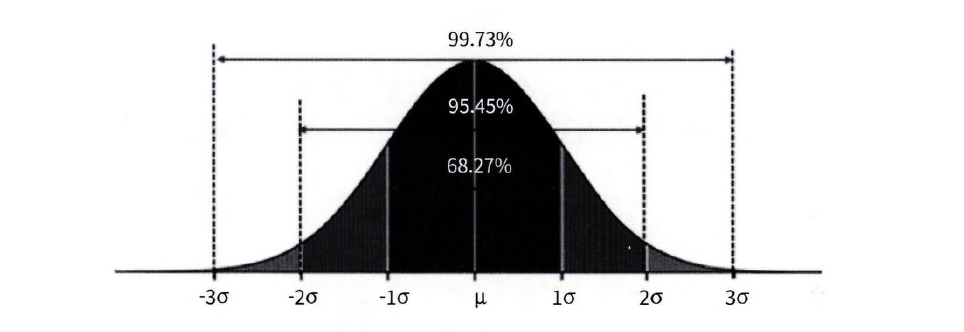
    
    평균이 0이고 표준편차가 1인 정규 분포

섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한 후 섞는 것임

<가우시안 분포 A,B,C가 있다고 가정할 때 GMM 군집화 방식>

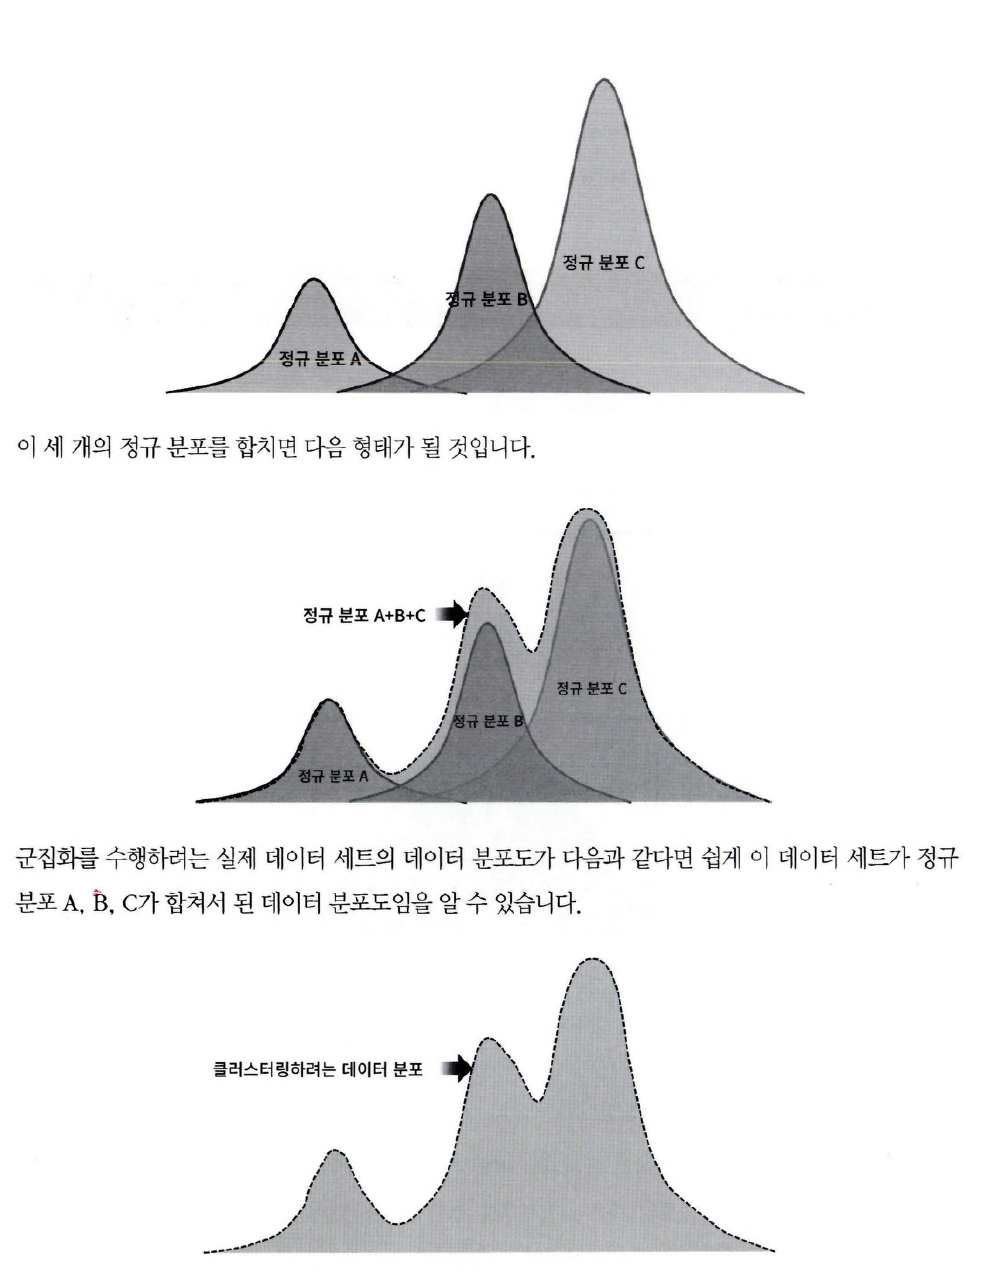
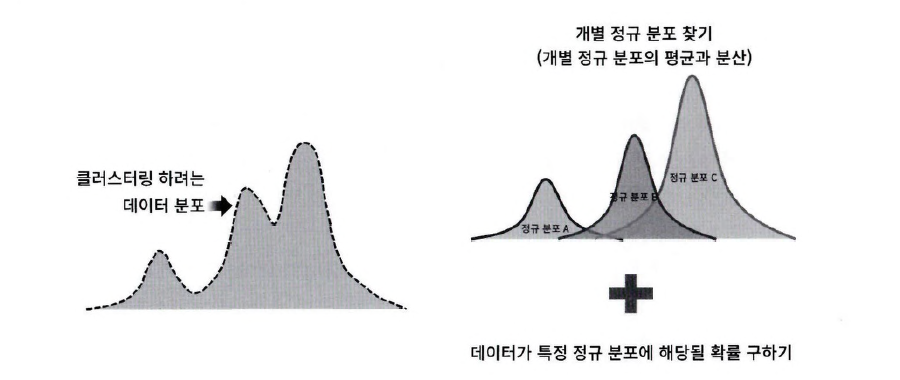

- 모수 추정

    1. 개별 정규 분포의 평균과 분산

    2. 각 데이터가 여떤 정규 분포에 해당ㄷ되는지의 확률
    
    를 추정하는 것

### GMM을 이용한 붓꽆 데이터 세트 군집화

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# dataframe으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF에 저장
irisDF['gmm_cluster'] = gmm_cluster_labels

# target 값에 따라 gmm_cluster 값이 어떻게 매핑되었는지 확인
iris_result = irisDF.groupby('target')['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


Target 0 은 cluster 1으로 Target 2는 cluster 2로 잘 매핑

Target 1만 cluster 0으로 45개(90%), cluster 2로 5개(10%) 매핑

K-평균 군집화 결과보다 더 효과적인 분류 결과 도출됨

In [9]:
# K-평균 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby('target')['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


붓꽃 데이터 세트는 GMM 군집화가 더 효과적임

K-평균 ← 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 효과적으로 군집화 수행 가능

### GMM과 K-평균의 비교

K-평균

원형의 범위에서 군집화 수행 → 데이터 세트가 원형의 범위를 가질수록 군집화 효율이 높아짐

데이터가 길쭉한 타원형으로 늘어선 경우와 같이 원형의 범위로 퍼져 있지 않는 경우 군집화를 잘 수행하지 못함

In [10]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

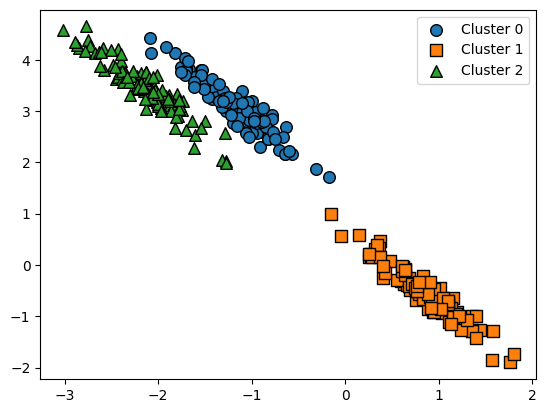

In [11]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타언형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y

# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

<ipython-input-10-f4c266540d94>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


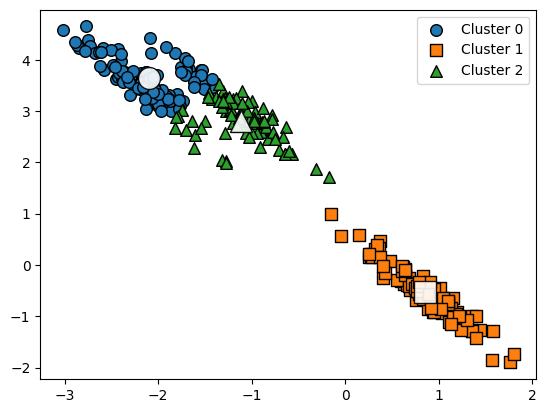

In [12]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
from sklearn.cluster import KMeans

kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음

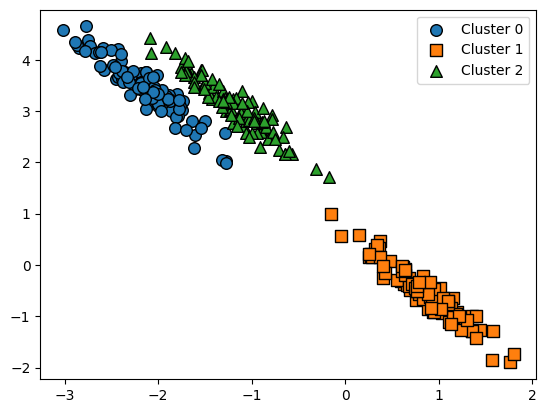

In [13]:
# GMM으로 군집화 수행
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter=False
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

정확하게 군집화 됨

In [14]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('### GMM Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64
### GMM Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


KMeans의 경우 군집 1번만 정확히 매핑된 반면 나머지 군집의 경우 target 값과 어긋나는 경우가 발생

하지만 GMM의 경우는 군집이 target 값과 잘 매핑 되어 있음

**GMM은 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있지만 군집화를 위한 수행 시간이 오래 걸린다는 단점이 존재**